In [230]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers  import l1,l2,l1_l2

In [5]:
diabetes_data = pd.read_csv("diabetes.csv") 
diabetes_data.shape

(768, 9)

In [6]:
diabetes_data.describe() #showing statistical values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#viewing the input features that determines the presence of diabetes

diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
from sklearn.model_selection import train_test_split

#X contains input features without output attribute
X = diabetes_data.drop(columns = ['Outcome']).copy()
y = diabetes_data['Outcome']

#training_data_size=60%
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X,y, train_size=0.6)

#validating_data_size and testing_data_size = 20% each
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test,y_valid_test, test_size=0.5)

X_train = X_train.values
X_valid = X_valid.values
X_test = X_test.values
y_train = y_train.values
y_valid = y_valid.values
y_test = y_test.values
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(460, 8)
(154, 8)
(154, 8)


In [9]:
X_train.size

3680

In [10]:
X_train = X_train.T
X_valid = X_valid.T
X_test = X_test.T

y_train = y_train.reshape(1, X_train.shape[1])
y_valid = y_valid.reshape(1, X_valid.shape[1])
y_test = y_test.reshape(1, X_test.shape[1])

In [11]:
#defining sigmoid function 
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [12]:
#defining the cost function of logistic regression
def cost_function(m,y,A):
    return -(1/m)*np.sum( y*np.log(A) + (1-y)*np.log(1-A))

In [13]:
def print_cost(i,cost,epochs):
    if(i%(epochs/10) == 0):
        print("cost value in ", i, "th epoch is : ", cost)

In [14]:
#defining the model

def logistic_regression_model(X, y, learning_rate, epochs):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_values = []
    validation_cost_values = []

    for i in range(epochs):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        cost = cost_function(m,y,A)
        
        # Gradient Descent
        dW = (1/m) * np.dot(A-y, X.T)
        dB = (1/m) * np.sum(A - y)
        
        W = W - learning_rate * dW.T
        B = B - learning_rate * dB

        # keeping track of validation dataset cost function values
        A_Valid = sigmoid(np.dot(W.T, X) + B)
        validation_loss = cost_function(m,y,A_Valid)
        validation_cost_values.append(validation_loss)
        
        # keeping track of training dataset loss function values
        cost_values.append(cost)
        print_cost(i,cost,epochs)
        
    return W, B, cost_values, validation_cost_values

In [72]:
epochs = 1000000
learning_rate = 0.00029
W, B, cost_values, validation_cost_values = logistic_regression_model(X_train, y_train, learning_rate = learning_rate, epochs = epochs)

cost value in  0 th epoch is :  0.6931471805599452
cost value in  100000 th epoch is :  0.6296001534928567
cost value in  200000 th epoch is :  0.5983225933382859
cost value in  300000 th epoch is :  0.5714668766172452
cost value in  400000 th epoch is :  0.5486522600025266
cost value in  500000 th epoch is :  0.5294405212079177
cost value in  600000 th epoch is :  0.5133976746579891
cost value in  700000 th epoch is :  0.5035427979303352
cost value in  800000 th epoch is :  0.4995737903356091
cost value in  900000 th epoch is :  0.4964457125883251


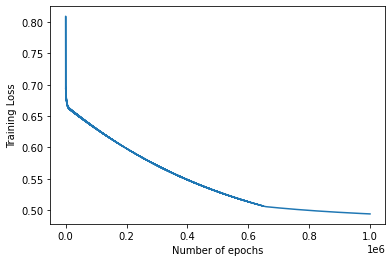

In [74]:
#plotting graph between number of iterations and traininng loss
plt.plot(range(epochs), cost_values)
plt.xlabel('Number of epochs')
plt.ylabel('Training Loss')
plt.show()

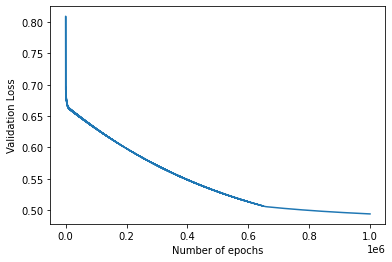

In [75]:
plt.plot(range(epochs), validation_cost_values)
plt.xlabel('Number of epochs')
plt.ylabel('Validation Loss')
plt.show()

In [76]:
def accuracy(X, y, W, B, m):
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    A = A > 0.5
    A = np.array(A)
    acc = (1 - np.sum(np.absolute(A - y))/m)*100
    return acc

In [77]:
m = y_valid.shape[1]
accuracy_valid = accuracy(X_valid, y_valid, W, B, m)
print("Accuracy for validation set is : ", round(accuracy_valid, 3), "%")

Accuracy for validation set is :  78.571 %


In [78]:
n = y_test.shape[1]
accuracy_test = accuracy(X_test, y_test, W, B, n)
print("Accuracy for testing set is : ", round(accuracy_test, 3), "%")

Accuracy for testing set is :  75.325 %


In [79]:
x = diabetes_data.iloc[:, :-1].values
Y = diabetes_data["Outcome"].values

In [80]:
x_train, x_test_valid, Y_train, Y_test_valid = train_test_split(X, y, test_size=0.6)

In [81]:
x_valid, x_test, Y_valid, Y_test = train_test_split(x_test_valid, Y_test_valid, test_size=0.5)

In [229]:
#scaling the data
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(x_train)
X_valid_norm = normalizer.fit_transform(x_valid)
X_test_norm = normalizer.transform(x_test)

In [166]:
#neural network model without regularizer and one hidden layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation="relu", input_dim=8))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_88 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________
None


In [168]:
#fitting the test data into model
history = model.fit(X_train_norm, Y_train, validation_data=(X_valid_norm,Y_valid),epochs=100, batch_size=64,verbose=0)

In [231]:
# Testing the the first neural network model
model_loss, model_accuracy = model.evaluate(X_test_norm, Y_test, verbose=0)
print('Loss without regularizer is', model_loss)
print('Accuracy without regularizer is:', model_accuracy)

Loss without regularizer is 0.6076681017875671
Accuracy without regularizer is: 0.7402597665786743


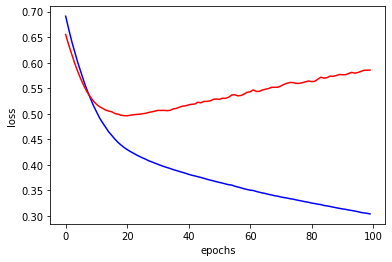

In [232]:
#plotting graph between model loss and epochs
plt.plot(history.history['loss'],"b",label="Train Loss")
plt.plot(history.history['val_loss'],"r",label="Validation loss")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

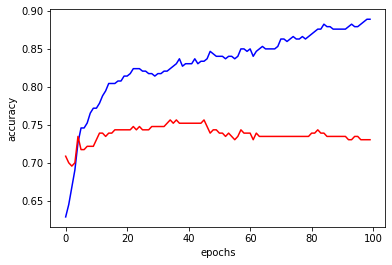

In [246]:
#plotting graph between model accuracy and epochs
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

In [176]:
#neural network model with regularizer and two hiddens layer
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(64, activation="relu", input_dim=8))
model1.add(tf.keras.layers.Dense(16, activation='relu'))
model1.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=l1_l2(0.01)))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model1.summary())

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_91 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_92 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 17        
Total params: 1,905
Trainable params: 1,905
Non-trainable params: 0
_________________________________________________________________
None


In [177]:
#fitting the test data into model1
history1 = model1.fit(X_train_norm, Y_train,validation_data=(X_valid_norm,Y_valid),epochs=100, batch_size=32, verbose=0)

In [237]:
# Testing the the second neural network model
model1_loss1, model_accuracy1 = model1.evaluate(X_test_norm, Y_test,verbose=0)
print('Loss with regularizer is', model1_loss1)
print('Accuracy with regularizer is:', model_accuracy1)

Loss with regularizer is 0.6498211622238159
Accuracy with regularizer is: 0.7662337422370911


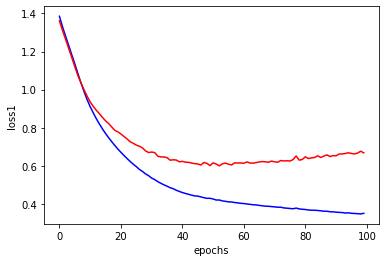

In [241]:
#plotting graph between model1 loss and epochs
plt.plot(history1.history['loss'],"b")
plt.plot(history1.history['val_loss'],"r")
plt.ylabel('loss1')
plt.xlabel('epochs')
plt.show()

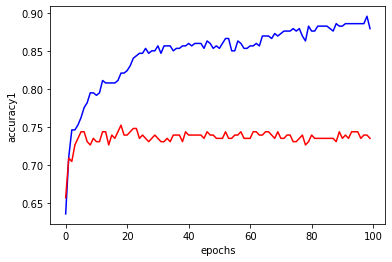

In [242]:
# plotting graph between model1 accuracy and epochs
plt.plot(history1.history['accuracy'],'b')
plt.plot(history1.history['val_accuracy'],"r")
plt.ylabel('accuracy1')
plt.xlabel('epochs')
plt.show()

In [223]:
#neural network model with regularizer and dropout
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(64, activation="relu", input_dim=8))
model2.add(tf.keras.layers.Dense(16, activation='relu'))
model2.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l1(0.02)))
model2.add(Dropout(.4))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 64)                576       
_________________________________________________________________
dense_123 (Dense)            (None, 16)                1040      
_________________________________________________________________
dense_124 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 33        
Total params: 2,193
Trainable params: 2,193
Non-trainable params: 0
_________________________________________________________________
None


In [224]:
#fitting the test data into model2
history2 = model2.fit(X_train_norm, Y_train,validation_data=(X_valid_norm,Y_valid),epochs=110, batch_size=64,verbose=0)

In [243]:
# Testing the the third neural network model
model2_loss2, model2_accuracy2 = model2.evaluate(X_test_norm, Y_test,verbose=0)
print('Loss with regularizer and dropout is', model2_loss2)
print('Accuracy with regularizer and dropout is:', model2_accuracy2)

Loss with regularizer and dropout is 0.5769876837730408
Accuracy with regularizer and dropout is: 0.7705627679824829


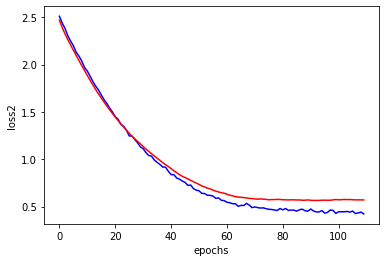

In [244]:
# plotting graph between model2 loss and epochs
plt.plot(history2.history['loss'],"b")
plt.plot(history2.history['val_loss'],"r")
plt.ylabel('loss2')
plt.xlabel('epochs')
plt.show()

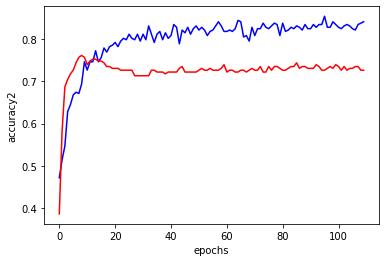

In [245]:
# plotting graph between model2 accuracy and epochs
plt.plot(history2.history['accuracy'],'b')
plt.plot(history2.history['val_accuracy'],"r")

plt.ylabel('accuracy2')
plt.xlabel('epochs')
plt.show()